# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import time
%matplotlib inline


## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# Будем рассматривать распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moyal.html#scipy.stats.moyal
moyal_rv = sts.moyal()
sample = moyal_rv.rvs(100)
sample


array([ 4.01096458e-01,  8.53352684e-01,  5.16809451e+00,  1.88319449e+00,
        2.04030613e+00,  4.08194376e+00, -5.99137931e-01,  2.52608051e-01,
        4.44777526e-01,  3.68048656e+00,  1.06065750e+00, -3.27172583e-01,
        2.36109821e+00,  3.85916384e-03,  1.29604906e+00, -2.34671189e+00,
        1.02297877e+00,  1.13162409e+00,  1.12213263e+00,  9.49711364e-01,
        1.23050479e-01,  1.10920652e+00,  5.84160103e-01,  6.33441226e+00,
        3.47386990e+00,  4.08879974e+00,  4.37828755e+00,  1.10754984e+00,
       -1.85182008e+00,  1.28733283e+00,  1.03575930e+00,  1.02886733e+00,
        1.98338533e+00,  9.50155764e-01, -5.97685698e-01,  9.40618590e+00,
        1.20522451e+00, -4.19645972e-01, -5.03183161e-01, -3.76908769e-01,
        1.43535540e+00,  8.39142486e+00,  2.75525077e+00,  5.48709523e+00,
        1.53731195e+00, -6.59705335e-01,  1.52552128e+00, -6.11879434e-01,
        2.07699224e+00,  1.92331270e-01,  1.50373633e+00, -1.37477132e+00,
       -3.67798030e-01,  

In [3]:
# Проверим типы данных
sample.dtype

dtype('float64')

In [4]:
# Истинное среднее случайной величины
real_mean = moyal_rv.mean()
print(real_mean)

1.2703628454614782


In [5]:
# Истинная дисперсия случайной величины
real_var = moyal_rv.var()
print(real_var)

4.934802200544679


### Постройте гистограмму выборки и теоретическую плотность распределения

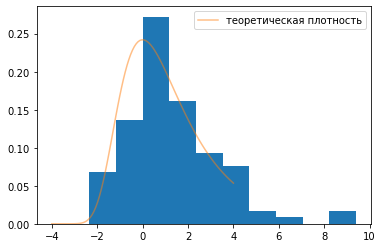

In [6]:
plt.hist(sample, density = True)
x = np.linspace(-4, 4, 100)
pdf = moyal_rv.pdf(x)
plt.plot(x, pdf, label = 'теоретическая плотность', alpha = 0.5)
plt.legend()

In [7]:
# Выборочное среднее
sample_mean = sample.mean()
print(f'Выборочное среднее: {sample_mean}')

Выборочное среднее: 1.3643304839999295


In [8]:
# Выборочная дисперсия
sample_var = sample.var()
print(f'Выборочная дисперсия: {sample_var}')

Выборочная дисперсия: 4.255877701422301


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

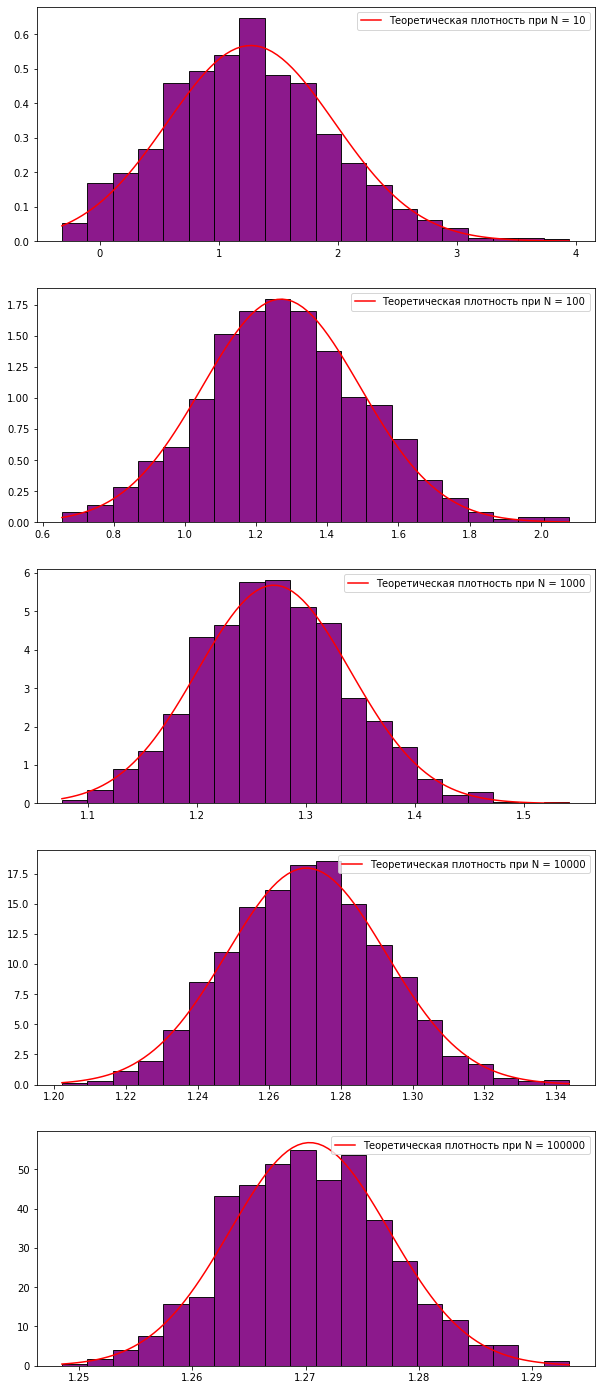

In [9]:
sample_list = [10, 100, 1000, 10000, 100000]

fig, axes = plt.subplots(len(sample_list), figsize = (10,25))

num = 0
                         
# построим гистограммы для различных выборок
for N in sample_list:
    means = []                 
    for i in range(1000):
        means.append(moyal_rv.rvs(N).mean())
    axes[num].hist(means, density=True, alpha = 0.9, color = 'purple', edgecolor='black', bins = 20)
    norm_rv = sts.norm(loc=moyal_rv.mean(), scale = moyal_rv.std() / np.sqrt(N))
    x = np.linspace(min(means), max(means), 100)
    pdf = norm_rv.pdf(x)
    axes[num].plot(x, pdf, label = f'Теоретическая плотность при N = {N}', color = 'red')
    axes[num].legend()
    num += 1        


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

При высоких значениях выборки, апроксимация работает хорошо: теоретическая плотность практически описывает характер распределения. На большом количестве данных мы можем использовать эту апроксимацию

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [10]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [11]:
# Отфильтруем наш датафрейм на два используя колонку churn
churn_false = df[df.churn == False]
churn_true = df[df.churn == True]

print(f'Количество строк в датафрейме с Churn=False: {len(churn_false)}')
print(f'Количество строк в датафрейме с Churn=True: {len(churn_true)}')

Количество строк в датафрейме с Churn=False: 2850
Количество строк в датафрейме с Churn=True: 483


Создадим функцию, которая возвращает нам доверительный интервал на уровне значимости 5%
Сделаем такую же функцию для _zconfint_generic

In [12]:
def zconf_5percent(data, column):
    left_conf = data[column].mean() - 1.96 * data[column].std() / np.sqrt(len(data))
    right_conf = data[column].mean() + 1.96 * data[column].std() / np.sqrt(len(data))
    print(f'Доверительный интервал для среднего по ЦПТ: [{left_conf}, {right_conf}]')

def ssw_zconfint(data, column):
    from statsmodels.stats.weightstats import _zconfint_generic
    print(_zconfint_generic(np.mean(data[column]), np.std(data[column], ddof = 1), alpha = 0.95,
                         alternative = 'two-sided'))
    
    

In [13]:
# Найдем доверительный интервал с помощью нашей функции zconf_5percent для churn_false
zconf_5percent(churn_false, 'total day calls')

Доверительный интервал для среднего по ЦПТ: [99.55617497470149, 101.0101408147722]


In [14]:
# Найдем доверительный интервал с помощью функции _zconfint_generic из пакета 
# statsmodels.stats.weightstats для churn_false
ssw_zconfint(churn_false, 'total day calls')

(99.04149114274125, 101.52482464673244)


In [15]:
# Найдем доверительный интервал с помощью нашей функции zconf_5percent для churn_true
zconf_5percent(churn_true, 'total day calls')

Доверительный интервал для среднего по ЦПТ: [99.41062692289533, 103.26018053052083]


In [16]:
# Найдем доверительный интервал с помощью функции _zconfint_generic из пакета 
# statsmodels.stats.weightstats для churn_false
ssw_zconfint(churn_true, 'total day calls')

(99.98204678079553, 102.68876067262063)


In [17]:
round((99.55617497470149 - 99.04149114274125)/ 99.04149114274125 *100, 1)

0.5

**Выводы:** 
Сравнив интревалы, полученные по формуле и с помощью встроенной функции, мы можем заметить, что интервалы не отличаются больше чем на ~ **1%**. Поскольку мы использовали Z-статистику равную 1.96 округленную до 2 знаков после запятоя, можем сделать вывод, что встроенные функции точнее показывают статистические параметры и лучше использовать их вместо рассчетов вручную